In [11]:
# make sure to use python 3.8, use virtual environment (to make terminal also 3.8) and reopen vscode 
from gym.wrappers import GrayScaleObservation
from gym.wrappers import ResizeObservation  # these things also use cv2, pip install it (opencv-python)
from gym.wrappers import FrameStack
import gym
from gym.spaces import Box
import numpy as np
from torchvision import transforms as T
from nes_py.wrappers import JoypadSpace

import gym_super_mario_bros  # install the VS code Developer kit?? refer to nes_py
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
# import retro # use to import sonic, #don't worry about it for now
from drpreisl_angus_tsa_DQN import DQN # our assignment 2 DQN modified for gym instead of gymnasium, may change later
import torch
import matplotlib.pyplot as plt

In [12]:
#Prints the reward per epsisode graph (Pulled from Assignment 2)
def reward_print(reward_per_episode, episodes, info): 
    mins = int(min(reward_per_episode)) - int(min(reward_per_episode)) * (.15)
    maxs = int(max(reward_per_episode)) + int(max(reward_per_episode)) * (.3) 
    plt.figure()
    plt.plot(reward_per_episode)
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Cumulative Reward', fontsize=20)
    plt.title(f'Cumulative Reward Per Episode ({info})', fontsize=24)
    plt.xticks([0, episodes * .2, episodes * .4, episodes * .6, episodes * .8, episodes], fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim(ymin= mins, ymax=maxs)
    plt.xlim(xmin=0, xmax=episodes)
    plt.grid()
    plt.show()

#prints the epsilon decay graph
def ep_decay(eps, episodes):
    epsilon_values = [(eps ** i) * 1 for i in range(episodes)]
    plt.figure()
    plt.plot(epsilon_values, linewidth=4)
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Epsilon Value', fontsize=20)
    plt.title(f"Epsilon Decay for {eps}", fontsize=24)
    plt.xticks([0, episodes * .2, episodes * .4, episodes * .6, episodes * .8, episodes], fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim(ymin=0, ymax=1)
    plt.xlim(xmin=0, xmax=episodes)
    plt.grid()
    plt.show()


# class GrayScaleObservation(gym.ObservationWrapper):
#     def __init__(self, env):
#         super().__init__(env)
#         obs_shape = self.observation_space.shape[:2]
#         self.observation_space = Box(low=0, high=255, shape=obs_shape, dtype=np.uint8)

#     def permute_orientation(self, observation):
#         # permute [H, W, C] array to [C, H, W] tensor
#         observation = np.transpose(observation, (2, 0, 1))
#         observation = torch.tensor(observation.copy(), dtype=torch.float)
#         return observation

#     def observation(self, observation):
#         observation = self.permute_orientation(observation)
#         transform = T.Grayscale()
#         observation = transform(observation)
#         return observation

class SkipFrame(gym.Wrapper):
    def __init__(self, env, skip):
        super().__init__(env)
        self._skip = skip

    def step(self, action):
        total_reward = 0.0
        for i in range(self._skip):
            # Accumulate reward and repeat the same action
            obs, reward, done, trunk, info = self.env.step(action)
            total_reward += reward
            if done:
                break
        return obs, total_reward, done, trunk, info


In [13]:
# create environment and agent + image preprocessing
env = gym_super_mario_bros.make('SuperMarioBros-1-1-v3', apply_api_compatibility=True, render_mode="None")
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# IMAGE PROCESSING HERE
# env = SkipFrame(env, skip=4)
env = GrayScaleObservation(env)
env = ResizeObservation(env, shape=(64, 64))
# env = FrameStack(env, num_stack = 4)
state, info = env.reset()
# env.render()

Buffer_Size = 5000
Mario = DQN(Buffer_Size, env)
print("Successfully Created agent")

Successfully Created agent


In [ ]:
# HyperParameters:
max_episodes = 500
epsilon = .9
discount = 0.99
action = Mario.action
# Run DQN here
total_rewards = Mario.train(episodes=max_episodes, epsilon=epsilon, discount=discount, action_function=action,
                            greedy=False)
Mario.save("drpreisl_angus_tsa_1-1.pickle")
print("training complete")    
reward_print(total_rewards, max_episodes, "World 1-1")
ep_decay(epsilon, max_episodes)
print("reward_list", total_rewards)

In [15]:
# Additional episodes
# Run DQN here
# new_total_rewards = Mario.train(episodes=max_episodes, epsilon=epsilon, discount=discount, action_function=action,
#                             greedy=False)

training complete


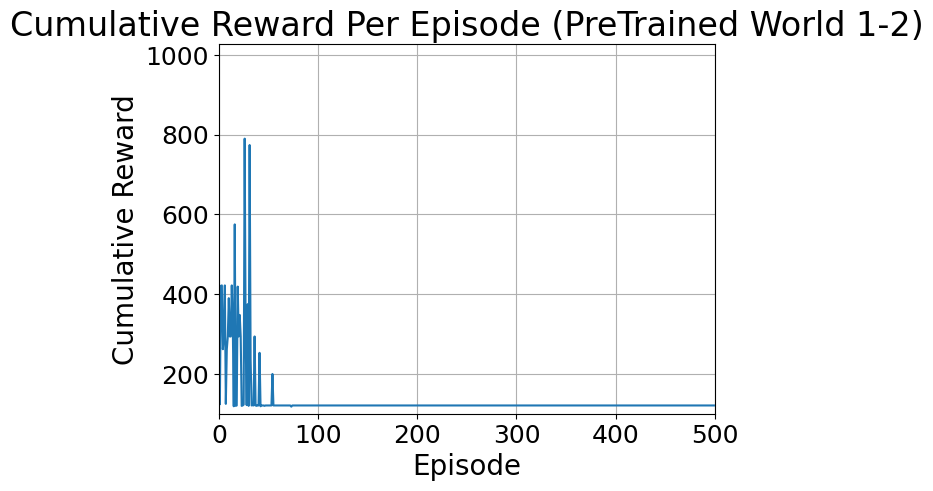

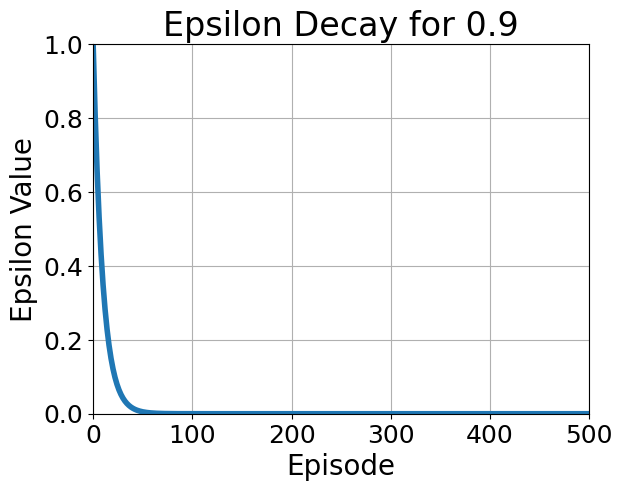

reward_list [422.0, 124.0, 421.0, 422.0, 262.0, 294.0, 422.0, 125.0, 262.0, 294.0, 390.0, 294.0, 294.0, 422.0, 326.0, 119.0, 575.0, 120.0, 121.0, 419.0, 294.0, 348.0, 294.0, 120.0, 121.0, 123.0, 790.0, 287.0, 122.0, 375.0, 120.0, 774.0, 235.0, 121.0, 122.0, 121.0, 294.0, 121.0, 120.0, 121.0, 121.0, 253.0, 119.0, 121.0, 121.0, 121.0, 120.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 200.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 118.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 

In [16]:
# test training on 2nd env with pretrained
env = gym_super_mario_bros.make('SuperMarioBros-1-2-v3', apply_api_compatibility=True, render_mode="none",)
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# IMAGE PROCESSING HERE
env = GrayScaleObservation(env)
env = ResizeObservation(env, shape=(64, 64))
state, info = env.reset()
Mario = DQN(Buffer_Size, env)
Mario.load("drpreisl_angus_tsa_1-1.pickle")
total_rewards = Mario.train(episodes=max_episodes, epsilon=epsilon, discount=discount, action_function=action,greedy=False)
Mario.save("drpreisl_angus_tsa_With_pre_1-2.pickle")
print("training complete")
reward_print(total_rewards, max_episodes, "PreTrained World 1-2")k
ep_decay(epsilon, max_episodes)
print("reward_list", total_rewards)

In [17]:
# # test training on 3nd env with pretrained
# env = gym_super_mario_bros.make('SuperMarioBros-2-1-v3', apply_api_compatibility=True, render_mode="none",)
# env = JoypadSpace(env, SIMPLE_MOVEMENT)

# # IMAGE PROCESSING HERE
# env = GrayScaleObservation(env)
# env = ResizeObservation(env, shape=(64, 64))
# state, info = env.reset()
# Mario = DQN(Buffer_Size, env)
# Mario.load("drpreisl_angus_tsa_1-1.pickle")
# #preload NN
# total_rewards = Mario.train(episodes=max_episodes, epsilon=epsilon, discount=discount, action_function=action,greedy=False)
# Mario.save("drpreisl_angus_tsa_With_pre_2-1.pickle")
# print("training complete")
# reward_print(total_rewards, max_episodes, "PreTrained World 2-1")
# ep_decay(epsilon, max_episodes)
# print("reward_list", total_rewards)